![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 9: Text processing continued

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-11-05)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/09_Text_processing_continued.ipynb)

**Resources:**


# Spacy installation

```
$ conda activate bts36
$ conda install -c conda-forge spacy
```



In [1]:
conda install -c conda-forge spacy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: //anaconda2/envs/bts36

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         147 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge



certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: / WARNING conda.core.path_actions:verify(961):

# Spacy introduction

## Import language models 



```
$ python -m spacy download en_core_web_sm
$ python -m spacy download en
```



In [98]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 74.8MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=1ae59ff5604a75e9e585f78f7ec993f0ed77a60dbb836c594157353447d83d25
  Stored in directory: /tmp/pip-ephem-wheel-cache-tbnlm3bw/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Once the model is downloaded and installed, we can load it as follows:

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Hands on: practical examples

## Word frequency

We can compute the word frequency on a text using spaCy. Within the Holy Grail dataset, lets:



*   Let's find the 5 most common nouns
*   Let's find the 20 most common lemmas that are not stopwords



### Find the 5 most common nouns

In [4]:
import os

In [6]:
os.getcwd()

'/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions'

In [8]:
#!wget 'https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/holy_grail.txt'

In [7]:
import spacy

nlp = spacy.load("en")

holy_grail = nlp(open('data/holy_grail.txt', 'r').read())


In [9]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'NOUN' and token.text not in STOP_WORDS and token.text != '#':
        char_counter[token.text] += 1

In [10]:
char_counter.most_common(5)

[('boom', 42), ('witch', 37), ('music', 29), ('clop', 26), ('singing', 26)]

### Find the 20 most common lemmas that are not stopwords

In [11]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

lemmas = Counter()

for token in holy_grail:
    if token.pos_ != 'PROPN' and not token.is_punct and not token.is_digit and not token.is_space and token.lower_ not in STOP_WORDS:
        lemmas[token.lemma_] += 1

In [12]:
counts = Counter(lemmas)
counts.most_common(20)

[('oh', 110),
 ('ha', 59),
 ('right', 55),
 ('yes', 53),
 ('come', 46),
 ('boom', 42),
 ('witch', 41),
 ('clop', 39),
 ('burn', 39),
 ('away', 38),
 ('look', 37),
 ('stop', 35),
 ('uh', 33),
 ('get', 30),
 ('tell', 30),
 ('music', 29),
 ('dead', 28),
 ('run', 28),
 ('squeak', 28),
 ('go', 27)]

### Your turn

* Let's find the 5 most common verbs
* Let's find the 5 most common personal names
* Let's find the 20 most common lemmas that are not stopwords, not numbers and not personal names
* What happens? Why some strange character appears? Next session we will learn how to filter through those to create cool t-SNE graphs

## Dispersion plots

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each proper noun appear among the 5 most frequent ones.
2. Visualize the appearances of the character that is named the most.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.

In [0]:
from spacy import load

nlp = load("en")

In [0]:
holy_grail = nlp(open("holy_grail.txt", 'r').read())

In [0]:
from collections import Counter

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'PROPN':
        char_counter[token.text] += 1

In [0]:
char_counter.most_common(5)

[('KNIGHT', 58), ('FATHER', 53), ('Sir', 52), ('Arthur', 36), ('HEAD', 36)]

We get Sir or HEAD within the characters, actually HEAD is a character, but Sir is not, let's change that using a `special case`, instead of the longer and ardous task of training.

In [0]:
import spacy

from spacy.symbols import ORTH, POS, NOUN, VERB, TAG

nlp_modified = spacy.load('en')
nlp_modified.tokenizer.add_special_case('Sir', [{ORTH: 'Sir', POS: NOUN, TAG: NOUN}])
nlp_modified.tokenizer.add_special_case('Grail', [{ORTH: 'Grail', POS: NOUN, TAG: NOUN}])
#nlp_modified.tokenizer.add_special_case('BLACK', [{ORTH: 'BLACK', POS: NOUN, TAG: NOUN}])

Let's try it again

In [0]:
holy_grail2 = nlp_modified(open("holy_grail.txt", 'r').read())

In [0]:
from collections import Counter

char_counter2 = Counter()

for token in holy_grail2:
    if token.pos_ == 'PROPN':
        char_counter2[token.text] += 1

In [0]:
char_counter2.most_common(5)

[('KNIGHT', 58), ('FATHER', 53), ('Arthur', 36), ('HEAD', 36), ('BLACK', 32)]

### Visualize the most

In [0]:
char_counter2.most_common(1)

[('KNIGHT', 58)]

In [0]:
names, _ = zip(*char_counter2.most_common(1))

In [0]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [0]:
indexes = defaultdict(list)

for token in holy_grail2:
    if token.text in names:
        indexes[token.text].append(token.i)

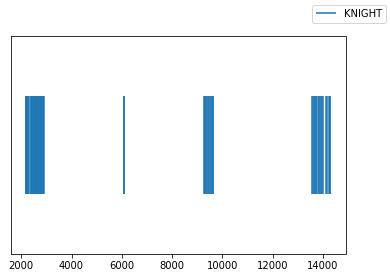

In [0]:
fig, axes = plt.subplots()

axes.eventplot(indexes[name], label=name)
axes.get_yaxis().set_visible(False)

fig.legend()

### Visualize all

In [0]:
char_counter2.most_common(5)

[('KNIGHT', 58), ('FATHER', 53), ('Arthur', 36), ('HEAD', 36), ('BLACK', 32)]

In [0]:
names, _ = zip(*char_counter2.most_common(5))

In [0]:
print(names, _)

('KNIGHT', 'FATHER', 'Arthur', 'HEAD', 'BLACK') (58, 53, 36, 36, 32)


In [0]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [0]:
indexes = defaultdict(list)

for token in holy_grail2:
    if token.text in names:
        print(token.i)
        indexes[token.text].append(token.i)

In [0]:
print(indexes)

defaultdict(<class 'list'>, {'Arthur': [43, 411, 1240, 1250, 1513, 1923, 2177, 2193, 2214, 2238, 2327, 4154, 4246, 4712, 4715, 4850, 4904, 4916, 4935, 4977, 5017, 5328, 6012, 6028, 6054, 7174, 8885, 8991, 12034, 13070, 14343, 14552, 14675, 16835, 17487, 17720], 'BLACK': [2185, 2201, 2225, 2248, 2257, 2284, 2297, 2391, 2404, 2433, 2459, 2478, 2493, 2511, 2533, 2553, 2568, 2596, 2623, 2641, 2672, 2700, 2713, 2733, 2766, 2774, 2795, 2816, 2832, 2858, 2866, 2890], 'KNIGHT': [2186, 2202, 2208, 2226, 2232, 2249, 2258, 2261, 2273, 2285, 2288, 2298, 2392, 2405, 2434, 2460, 2479, 2494, 2512, 2534, 2554, 2569, 2597, 2624, 2642, 2673, 2701, 2714, 2734, 2767, 2775, 2796, 2817, 2833, 2859, 2867, 2891, 6090, 6098, 9255, 9289, 9325, 9339, 9382, 9419, 9459, 9490, 9556, 9600, 9615, 9629, 13564, 13596, 13625, 13668, 13702, 13732, 13812, 13857, 13893, 13915, 13967, 14000, 14114, 14173, 14236, 14271, 14288], 'HEAD': [6521, 6535, 6542, 6554, 6565, 6574, 6587, 6601, 6627, 6639, 6651, 6657, 6667, 6683, 6692,

0
1
2
3
4


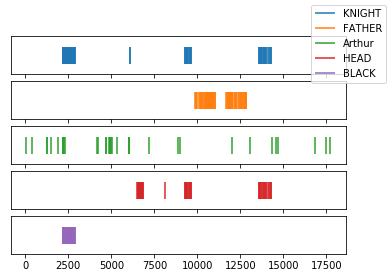

In [0]:
fig, axes = plt.subplots(5, sharex=True)

for index, name in enumerate(names):
    print(index)
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)

fig.legend()

## Your turn:

* Try to plot the NOUNS and clean the Doc whenever necessary adding special cases

* Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pride_and_prejudice.txt)

# Text similarity

Embedded words can be compared with each other based on the context, i.e. how far backwards the word embedding looks. 

In this case, we can pass a string of words and see how far appart their PCA components are:

## Using PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

Source: Wikipedia

In [35]:
import numpy as np
import spacy
from sklearn.decomposition import PCA

# We load the language model
nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

# Pass the tokens to a Doc
animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 2 components
pca = PCA(n_components=2)
animal_vecs_transformed = pca.fit_transform(animal_vectors)

In [36]:
print(animal_vecs_transformed)

[[ 2.8304355   3.818894  ]
 [-0.9081508  -2.36113   ]
 [-2.9921038  -6.7464747 ]
 [-3.7300808   2.921094  ]
 [-2.9397986   4.614554  ]
 [-8.567785   -0.03441417]
 [-1.8463446  -5.1698656 ]
 [-6.079878    3.6220999 ]
 [-2.5673375  -0.0304437 ]
 [-6.719927    7.282258  ]
 [ 0.5054483  -5.5731196 ]
 [-3.5111918  -4.8807573 ]
 [-2.7992313  10.778592  ]
 [-0.28298783  3.1065476 ]
 [-2.7526243  -4.414376  ]
 [-1.8025216  -6.0210266 ]
 [ 4.7226553  -7.452967  ]
 [ 7.8628106   1.9498671 ]
 [10.796334    2.9491363 ]
 [20.782282    1.6415396 ]]


In [37]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
animal_vecs_transformed = np.c_[animals.split(), animal_vecs_transformed]

In [38]:
print(animal_vecs_transformed)

[['plane' '2.8304355' '3.818894']
 ['dog' '-0.9081508' '-2.36113']
 ['cat' '-2.9921038' '-6.7464747']
 ['hamster' '-3.7300808' '2.921094']
 ['lion' '-2.9397986' '4.614554']
 ['tiger' '-8.567785' '-0.034414172']
 ['elephant' '-1.8463446' '-5.1698656']
 ['cheetah' '-6.079878' '3.6220999']
 ['monkey' '-2.5673375' '-0.030443698']
 ['gorilla' '-6.719927' '7.282258']
 ['antelope' '0.5054483' '-5.5731196']
 ['rabbit' '-3.5111918' '-4.8807573']
 ['mouse' '-2.7992313' '10.778592']
 ['rat' '-0.28298783' '3.1065476']
 ['zoo' '-2.7526243' '-4.414376']
 ['home' '-1.8025216' '-6.0210266']
 ['pet' '4.7226553' '-7.452967']
 ['fluffy' '7.8628106' '1.9498671']
 ['wild' '10.796334' '2.9491363']
 ['domesticated' '20.782282' '1.6415396']]


In [39]:
component_1 = [float(x) for x in animal_vecs_transformed[:, 1]]
component_2 = [float(x) for x in animal_vecs_transformed[:, 2]]

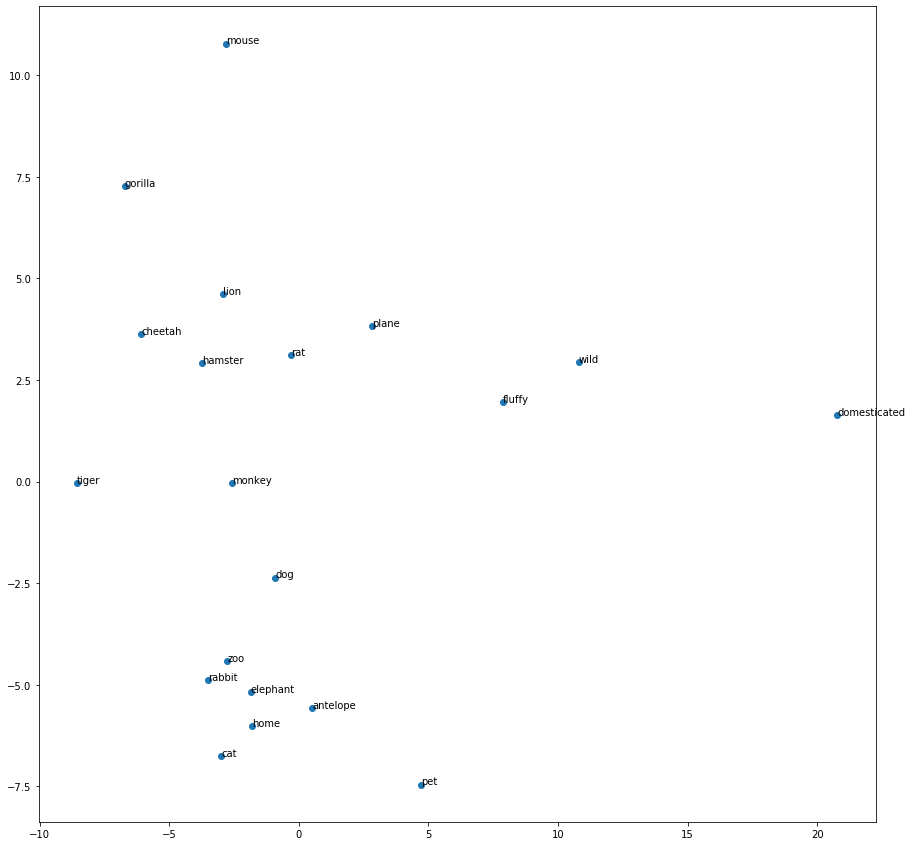

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_1, component_2)

for i, txt in enumerate(animal_vecs_transformed[:, 0]):
    ax.annotate(txt, (component_1[i], component_2[i]))

In [84]:
nlp = spacy.load("en")
food = "bottle bike case house orange salat ginger water tomato cucumber meat chocolate lemon apple pear banana chicken pork beef tuna tea coffee milk juice"

# Pass the tokens to a Doc
food_tokens = nlp(food)

# Create a vector of tokens with numpy
food_vectors = np.vstack([word.vector for word in food_tokens if word.has_vector])

#Run a PCA of 2 components
pca = PCA(n_components=2)
food_vecs_transformed = pca.fit_transform(food_vectors)

In [85]:
print(food_vecs_transformed)

[[  2.8884568    5.0461674 ]
 [  3.3052647    5.0764284 ]
 [  1.2552722   -3.0190463 ]
 [  7.757114    -2.6961715 ]
 [ 12.651269     0.41500023]
 [ 12.302945     3.0683978 ]
 [  2.02044     -7.119278  ]
 [  1.4170586   -2.7266657 ]
 [  5.0355473   -6.039294  ]
 [ -0.17230015  -0.82514745]
 [ -3.9518127   -3.601337  ]
 [ -0.7988022   -4.421873  ]
 [  0.29579374  -5.6311164 ]
 [  5.1670704    2.5148902 ]
 [  5.518163     3.1266308 ]
 [ -2.326573     6.7908864 ]
 [ -5.0995884   10.9433565 ]
 [ -2.716483     4.8021045 ]
 [ -6.451577    -3.6941485 ]
 [ -6.5467806    0.8445963 ]
 [ -6.075523     3.9864821 ]
 [ -8.181745    -7.524337  ]
 [-11.321103     2.6909132 ]
 [ -5.9721074   -2.007443  ]]


In [86]:
food_vecs_transformed = np.c_[food.split(), food_vecs_transformed]

In [87]:
print(food_vecs_transformed)

[['bottle' '2.8884568' '5.0461674']
 ['bike' '3.3052647' '5.0764284']
 ['case' '1.2552722' '-3.0190463']
 ['house' '7.757114' '-2.6961715']
 ['orange' '12.651269' '0.41500023']
 ['salat' '12.302945' '3.0683978']
 ['ginger' '2.02044' '-7.119278']
 ['water' '1.4170586' '-2.7266657']
 ['tomato' '5.0355473' '-6.039294']
 ['cucumber' '-0.17230015' '-0.82514745']
 ['meat' '-3.9518127' '-3.601337']
 ['chocolate' '-0.7988022' '-4.421873']
 ['lemon' '0.29579374' '-5.6311164']
 ['apple' '5.1670704' '2.5148902']
 ['pear' '5.518163' '3.1266308']
 ['banana' '-2.326573' '6.7908864']
 ['chicken' '-5.0995884' '10.9433565']
 ['pork' '-2.716483' '4.8021045']
 ['beef' '-6.451577' '-3.6941485']
 ['tuna' '-6.5467806' '0.8445963']
 ['tea' '-6.075523' '3.9864821']
 ['coffee' '-8.181745' '-7.524337']
 ['milk' '-11.321103' '2.6909132']
 ['juice' '-5.9721074' '-2.007443']]


In [88]:
component_1 = [float(x) for x in food_vecs_transformed[:, 1]]
component_2 = [float(x) for x in food_vecs_transformed[:, 2]]

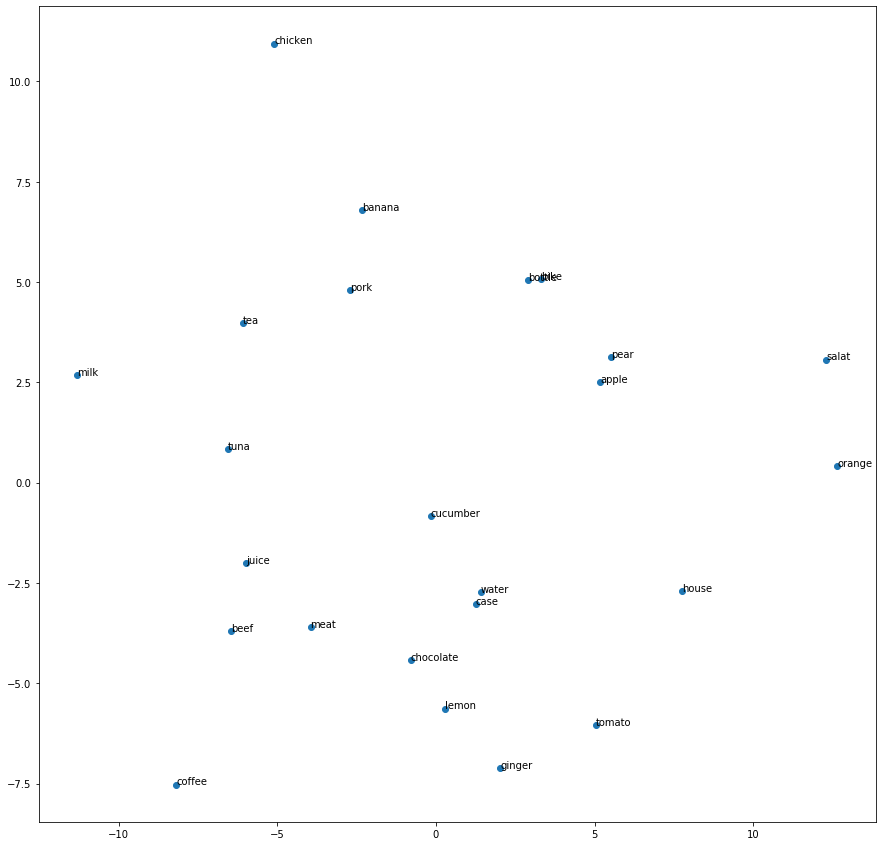

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_1, component_2)

for i, txt in enumerate(food_vecs_transformed[:, 0]):
    ax.annotate(txt, (component_1[i], component_2[i]))

## Using t-SNE

**t-Distributed Stochastic Neighbor Embedding** (t-SNE) is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets. 

*Source: Laurens van der Maaten*

Visualizing high-dimensional data by projecting it into a low-dimensional space is a classic operation that anyone working with data has probably done at least once in their life. There are a huge variety of methods for reducing dimensionality, but one very popular method is t-SNE, a method proposed by Geoffry Hinton’s group back in 2008.

### Benefits of t-SNE
* t-SNE, unlike PCA, is not a linear projection. It uses the **local relationships** between points to create a low-dimensional mapping. This allows it to capture **non-linear structure**.
* t-SNE creates a **probability distribution** using the **Gaussian** distribution that defines the relationships between the points in high-dimensional space.
* t-SNE uses the **Student t-distribution** to **recreate** the probability distribution in low-dimensional space. This prevents the **crowding problem**, where points tend to get crowded in low-dimensional space due to the **curse of dimensionality**.
* t-SNE optimizes the embeddings directly using gradient descent. The cost function is non-convex though, meaning there is the risk of getting stuck in local minima. t-SNE uses multiple tricks to try to avoid this problem.

Source: [ML explained](https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/)

### 2D

Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [90]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

# We load the language model
nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

# Pass the tokens to a Doc
animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 2 components
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=1)
animal_vecs_tsne = tsne.fit_transform(animal_vectors)

In [91]:
print(animal_vecs_tsne)

[[ 501.0021    -25.459309]
 [-100.13999    19.437176]
 [ 649.0963     35.533543]
 [-236.99318   495.424   ]
 [ -56.905727  -77.28582 ]
 [  11.32265   -64.0885  ]
 [ 700.2642     57.387417]
 [ 125.6035     45.69727 ]
 [ 558.68445    -2.653744]
 [-179.3872    425.43942 ]
 [-431.73312   176.21211 ]
 [-398.206     165.14369 ]
 [-213.08568   466.51666 ]
 [ -94.10208   -68.67183 ]
 [ 614.0961     20.705584]
 [ -62.59595    62.246   ]
 [-158.43594    52.92782 ]
 [-152.24127  -116.10267 ]
 [-200.1741   -153.3277  ]
 [-243.57364  -185.1883  ]]


In [92]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
animal_vecs_tsne = np.c_[animals.split(), animal_vecs_tsne]

In [93]:
print(animal_vecs_tsne)

[['plane' '501.0021' '-25.459309']
 ['dog' '-100.13999' '19.437176']
 ['cat' '649.0963' '35.533543']
 ['hamster' '-236.99318' '495.424']
 ['lion' '-56.905727' '-77.28582']
 ['tiger' '11.32265' '-64.0885']
 ['elephant' '700.2642' '57.387417']
 ['cheetah' '125.6035' '45.69727']
 ['monkey' '558.68445' '-2.653744']
 ['gorilla' '-179.3872' '425.43942']
 ['antelope' '-431.73312' '176.21211']
 ['rabbit' '-398.206' '165.14369']
 ['mouse' '-213.08568' '466.51666']
 ['rat' '-94.10208' '-68.67183']
 ['zoo' '614.0961' '20.705584']
 ['home' '-62.59595' '62.246']
 ['pet' '-158.43594' '52.92782']
 ['fluffy' '-152.24127' '-116.10267']
 ['wild' '-200.1741' '-153.3277']
 ['domesticated' '-243.57364' '-185.1883']]


In [94]:
component_1_tsne = [float(x) for x in animal_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in animal_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2])]

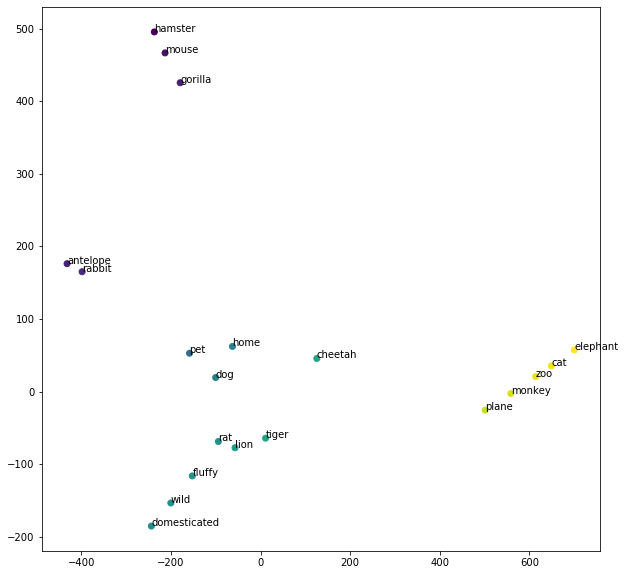

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(animal_vecs_tsne[:, 0]):
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

### 3D

Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [96]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

# We load the language model
nlp = spacy.load("en")
animals = "plane dog cat hamster lion tiger elephant cheetah monkey gorilla antelope rabbit mouse rat zoo home pet fluffy wild domesticated"

# Pass the tokens to a Doc
animal_tokens = nlp(animals)

# Create a vector of tokens with numpy
animal_vectors = np.vstack([word.vector for word in animal_tokens if word.has_vector])

#Run a PCA of 3 components
tsne = TSNE(n_components=3, init='random', random_state=3, perplexity=1)
animal_vecs_tsne = tsne.fit_transform(animal_vectors)

In [97]:
print(animal_vecs_tsne)

[[ 3.8927878e+02 -5.0274723e+01  1.2382286e+02]
 [ 1.2051491e+01 -1.7567432e+02 -3.2706479e+02]
 [ 2.4808805e+00  1.5287262e+02  2.0751537e+02]
 [ 1.8378435e+02 -2.7703290e+02 -3.6091164e+01]
 [-7.5683716e+01 -7.5516418e+02  2.5931619e+02]
 [ 3.0972994e+01  3.0377762e+02 -2.0292746e+02]
 [ 3.0287464e+01 -2.9409254e+01 -1.7587886e+02]
 [-4.0661190e+01 -1.4171548e+02  2.7786654e+01]
 [-4.2715790e+02 -7.5379372e+00  2.9797997e+00]
 [-1.1234941e+02  5.0197025e+02 -1.4057735e+02]
 [ 5.0031742e+01  1.3252924e+02 -2.7418388e+01]
 [ 1.7163353e+02  7.9613953e+01 -5.4455775e-01]
 [ 2.1748827e+02 -2.9735391e+02  9.4864273e+01]
 [ 2.0746593e+02  4.3251099e+01 -3.1413162e+02]
 [-2.9070605e+02 -9.4289146e+01  4.4857285e+01]
 [ 5.2518032e+01 -1.6520221e+02  2.7323685e+02]
 [-1.9587251e+02  9.7189293e+01  1.1618545e+02]
 [-1.8267874e+02 -2.8335892e+02  3.1815964e+02]
 [-2.9534995e+02 -2.2098064e+02 -1.9716943e+02]
 [ 2.3514230e+02  3.5056244e+02  9.0893913e+01]]


In [98]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
animal_vecs_tsne = np.c_[animals.split(), animal_vecs_tsne]

In [99]:
print(animal_vecs_tsne)

[['plane' '389.27878' '-50.274723' '123.82286']
 ['dog' '12.051491' '-175.67432' '-327.0648']
 ['cat' '2.4808805' '152.87262' '207.51537']
 ['hamster' '183.78435' '-277.0329' '-36.091164']
 ['lion' '-75.683716' '-755.1642' '259.3162']
 ['tiger' '30.972994' '303.77762' '-202.92746']
 ['elephant' '30.287464' '-29.409254' '-175.87886']
 ['cheetah' '-40.66119' '-141.71548' '27.786654']
 ['monkey' '-427.1579' '-7.537937' '2.9797997']
 ['gorilla' '-112.34941' '501.97025' '-140.57735']
 ['antelope' '50.031742' '132.52924' '-27.418388']
 ['rabbit' '171.63353' '79.61395' '-0.54455775']
 ['mouse' '217.48827' '-297.3539' '94.86427']
 ['rat' '207.46593' '43.2511' '-314.13162']
 ['zoo' '-290.70605' '-94.28915' '44.857285']
 ['home' '52.518032' '-165.20221' '273.23685']
 ['pet' '-195.87251' '97.18929' '116.18545']
 ['fluffy' '-182.67874' '-283.35892' '318.15964']
 ['wild' '-295.34995' '-220.98064' '-197.16943']
 ['domesticated' '235.1423' '350.56244' '90.89391']]


In [100]:
component_1_tsne = [float(x) for x in animal_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in animal_vecs_tsne[:, 2]]
component_3_tsne = [float(x) for x in animal_vecs_tsne[:, 3]]
distance = [np.sqrt(np.power(float(x), 2) + np.power(float(y), 2) + np.power(float(z), 2)) for x, y, z in zip(animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2], animal_vecs_tsne[:, 3])]

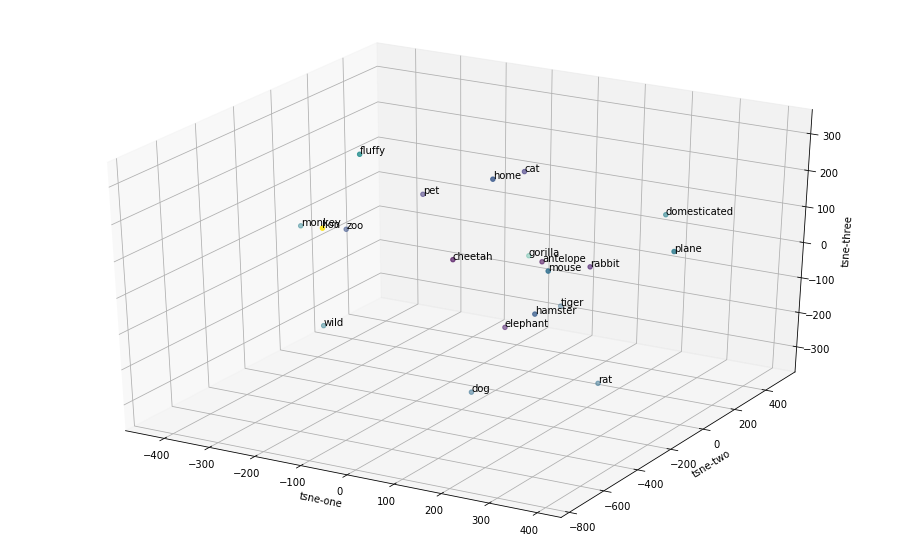

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=component_1_tsne, 
    ys=component_2_tsne, 
    zs=component_3_tsne, 
    c=distance
)

for name, x, y, z in zip(animal_vecs_tsne[:, 0], animal_vecs_tsne[:, 1], animal_vecs_tsne[:, 2], animal_vecs_tsne[:, 3]):
    ax.text(float(x), float(y), float(z), name)

ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

# Look for: rayarrow to seperate to labels from the same point with lines IMPORTANT FOR HOMEWORK
# also change dictionary, distances,...
# Restart Kernel before downloading library

## Exercise distance through t-SNE:

Generate a scatter plot with the distance of the words in the following file:

In [1]:
! wget 'https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/1-1000.txt'

/bin/sh: wget: command not found


In [2]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

# We load the language model
nlp = spacy.load("en")

# Words common in english
words = open('data/1-1000.txt', 'r').read()

# Pass the tokens to a Doc
word_tokens = nlp(words)

In [3]:
l = []
for token in word_tokens:
    if token.is_space:
        pass #print("This is a space")
    elif token.has_vector:
        l.append(token.text)
        print(token.text)
len(l)
print(l)

the
of
to
and
a
inhis
is
it
you
that
he
was
for
on
are
with
as
I
his
they
be
at
one
have
this
from
or
had
by
word
but
what
some
we
can
out
other
were
all
there
when
up
use
your
how
said
an
each
she
which
their
time
if
will
way
about
many
then
them
write
would
like
so
these
her
long
make
thing
see
him
two
has
look
more
day
could
go
come
did
number
sound
no
most
people
my
over
know
water
than
call
first
who
may
down
side
been
now
find
any
new
work
part
take
get
place
made
live
where
after
back
little
only
round
man
year
came
show
every
good
me
give
our
under
name
very
through
just
form
sentence
great
think
say
help
low
line
differ
turn
cause
much
mean
before
move
right
boy
old
too
same
tell
does
set
three
want
air
well
also
play
small
end
put
home
read
hand
port
large
spell
add
even
land
here
must
big
high
such
follow
act
why
ask
men
change
went
light
kind
off
need
house
picture
try
us
again
animal
point
mother
world
near
build
self
earth
father
head
stand
own
page
should
country
found
a

In [4]:
import collections

for item, count in collections.Counter(l).items():
    if count > 1:
        print(item)

In [111]:
# Create a vector of tokens with numpy
word_vectors = np.vstack([word.vector for word in word_tokens if word.has_vector and not word.is_space])
print(len(word_vectors))
#if we removed the "and not word.is_space" it counts the spaces as word as well

998


In [112]:
#Run a PCA of 2 components
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=1)
word_vecs_tsne = tsne.fit_transform(word_vectors)

In [113]:
print(word_vecs_tsne)

[[ 17.994694    87.889496  ]
 [-40.469746   -59.60663   ]
 [-48.942528   -60.749565  ]
 ...
 [-72.89238     -0.09691934]
 [ 48.28749    -28.388193  ]
 [-20.344158     3.4833374 ]]


In [114]:
len(l)

998

In [115]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
word_vecs_tsne = np.c_[l, word_vecs_tsne]

In [116]:
print(word_vecs_tsne)

[['the' '17.994694' '87.889496']
 ['of' '-40.469746' '-59.60663']
 ['to' '-48.942528' '-60.749565']
 ...
 ['teeth' '-72.89238' '-0.09691934']
 ['shell' '48.28749' '-28.388193']
 ['neck' '-20.344158' '3.4833374']]


In [33]:
component_1_tsne = [float(x) for x in word_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in word_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(word_vecs_tsne[:, 1], word_vecs_tsne[:, 2])]

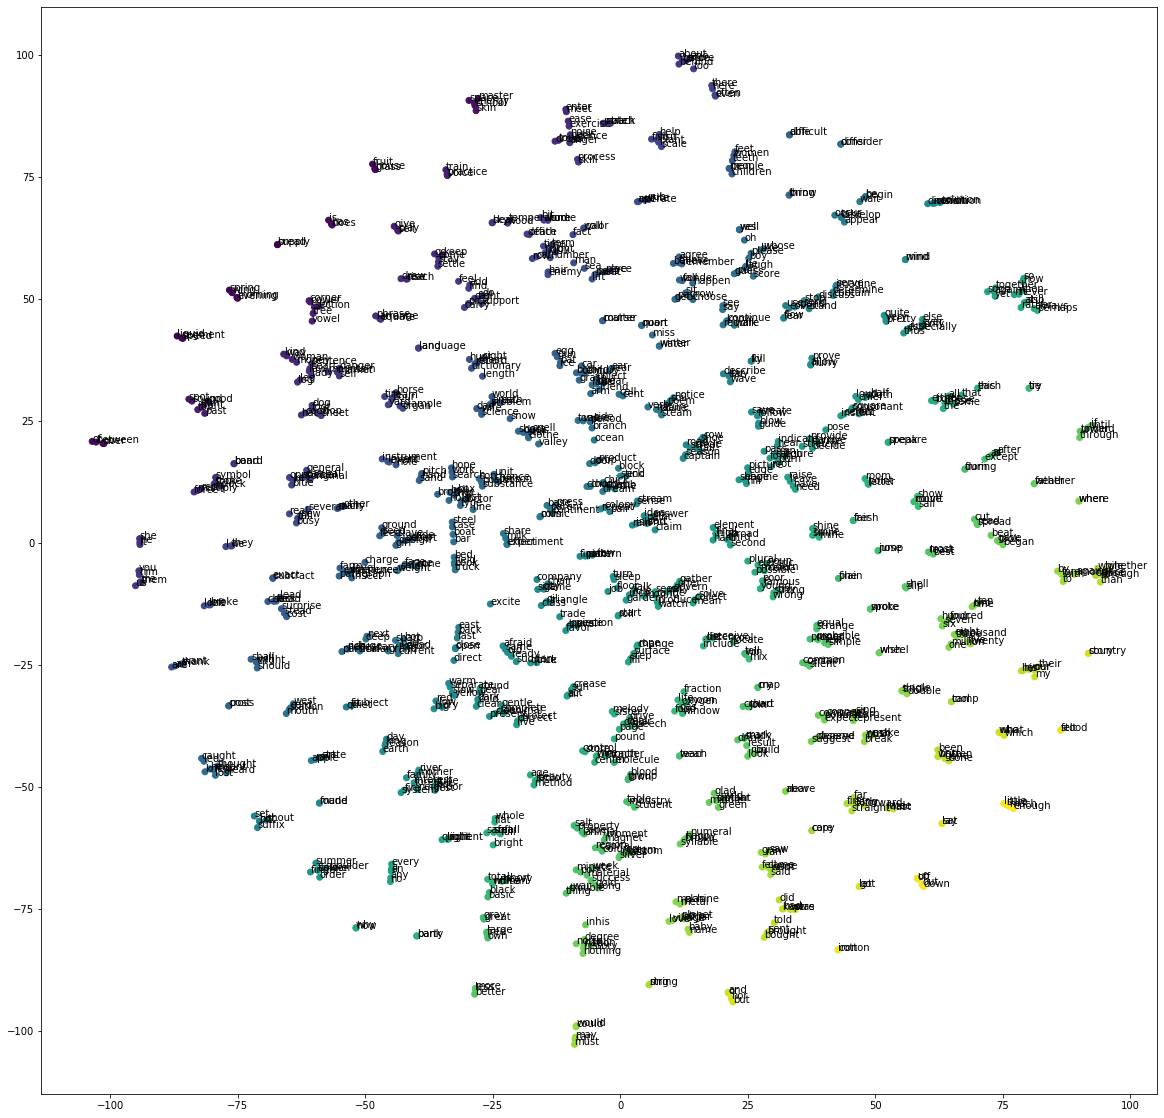

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(word_vecs_tsne[:, 0]):
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

# Examples with Jaccard similarity and tf-idf

In [5]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Jaccard similarity: exercise example

1. Write a function `lemmatize` that receives a spaCy `Doc` and returns a list of lemmas as strings, removing stopwords, punctuation signs and whitespace
2. Write a function that receives two spaCy `Doc`s and returns a floating point number representing the Jaccard similarity (see formula below) (hint: use [`set`s](https://docs.python.org/3/library/stdtypes.html#set))
3. Compute the Jaccard similarity between `t0` and `t1`
4. Create a pandas `DataFrame` that holds the Jaccard similarity of all the text combinations from `t0` to `t6` (hint: use [`enumerate`](http://book.pythontips.com/en/latest/enumerate.html#enumerate))

$$ J(A,B) = {{|A \cap B|}\over{|A \cup B|}} $$

### Function to lemmatize the spaCy Doc

In [13]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [14]:
nlp = spacy.load("en")

In [15]:
def lemmatize(doc):
    return [token.lemma_ for token in doc if not
           (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [16]:
lemmatize(nlp(t0))

['China',
 'strong',
 'economy',
 'grow',
 'rapid',
 'pace',
 'politically',
 'differ',
 'greatly',
 'Economy']

### Jaccard index function

In [17]:
def jaccard(doc1, doc2):
    s1 = set(lemmatize(doc1))
    s2 = set(lemmatize(doc2))
    return len(s1.intersection(s2)) / len(s1.union(s2))

#### Computation of t0 - t1

In [18]:
jaccard(nlp(t0), nlp(t1))

0.0625

### Create a pandas DataFrame that holds the Jaccard similarity of all the text combinations from t0 to t6 

In [19]:
import numpy as np
import pandas as pd

In [20]:
data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]
for ii, doc_a in enumerate(docs):
    for jj, doc_b in enumerate(docs):
        data[ii, jj] = jaccard(doc_a, doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.000000,0.0625,0.000000,0.055556,0.000000,0.050000,0.000
1,0.062500,1.0000,0.000000,0.000000,0.000000,0.000000,0.000
2,0.000000,0.0000,1.000000,0.047619,0.266667,0.000000,0.000
3,0.055556,0.0000,0.047619,1.000000,0.000000,0.052632,0.125
4,0.000000,0.0000,0.266667,0.000000,1.000000,0.000000,0.000
5,0.050000,0.0000,0.000000,0.052632,0.000000,1.000000,0.000
6,0.000000,0.0000,0.000000,0.125000,0.000000,0.000000,1.000


## Exercise Jaccard similarity:

Collect at least 6 sentences from political parties in your country. Try to do Jaccard Similarity on them so that you can see how similar the sentences are between the parties. You neeed to translate the sentences to english, so that I can evaluate :)

## TF - IDF: exercise example

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf–idf.

*Source: Wikipedia*

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:

![alt text](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/tf-idf.png)

In [46]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

In [47]:
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]

for doc in docs:
    print(doc)

China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy.
At last, China seems serious about confronting an endemic problem: domestic violence and corruption.
Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people.
Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled.
What's the future of Abenomics? We asked Shinzo Abe for his views
Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily.
Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses.


### Step 1
Write a function tf that receives a string and a spaCy Doc and returns the number of times the word appears in the lemmatized Doc

In [10]:
from collections import Counter

In [11]:
def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]

In [48]:
tf('China', nlp(t0))

1

### Step 2
Write a function idf that receives a string and a list of spaCy Docs and returns the number of docs that contain the word

In [49]:
def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return count / len(docs)

In [52]:
idf('economy', docs)

0.2857142857142857

### Step 3
Write a function tf_idf that receives a string, a spaCy Doc and a list of spaCy Docs and returns the product of tf(t, d) · idf(t, D).

In [53]:
def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)

In [54]:
tf_idf("China", nlp(t1), docs)

0.2857142857142857

### Step 4

Write a function all_lemmas that receives a list of Docs and returns a set of all available lemmas

In [55]:
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [56]:
print(all_lemmas(docs))

{'Abenomics', 'deer', 'Japan', 'economy', 'Russian', 'heal', 'ask', 'Putin', 'economic', 'greatly', 'minister', 'shirt', 'future', 'thing', 'Abe', 'ruble', 'rapid', 'people', 'Russia', 'ease', 'problem', 'endemic', 'fall', 'differ', 'violence', 'Vladimir', 'horse', 'tumble', 'sanction', 'ride', 'turmoil', 'accelerate', 'find', 'pace', 'hunt', 'daily', 'China', 'fix', 'Economy', 'value', 'Cuba', 'Obama', 'confront', 'view', 'Shinzo', 'hard', 'prime', 'domestic', 'grow', 'country', 'strong', 'corruption', 'work', 'politically'}


### Step 5
Write a function tf_idf_doc that receives a Doc and a list of Docs and returns a dictionary of {lemma: TF-IDF value}, corresponding to each the lemmas of all the available documents

In [57]:
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

In [58]:
print(tf_idf_doc(docs[0], docs))

{'Abenomics': 0.0, 'deer': 0.0, 'Japan': 0.0, 'economy': 0.2857142857142857, 'Russian': 0.0, 'heal': 0.0, 'ask': 0.0, 'Putin': 0.0, 'economic': 0.0, 'greatly': 0.14285714285714285, 'minister': 0.0, 'shirt': 0.0, 'future': 0.0, 'thing': 0.0, 'Abe': 0.0, 'ruble': 0.0, 'rapid': 0.14285714285714285, 'people': 0.0, 'Russia': 0.0, 'ease': 0.0, 'problem': 0.0, 'endemic': 0.0, 'fall': 0.0, 'differ': 0.14285714285714285, 'violence': 0.0, 'Vladimir': 0.0, 'horse': 0.0, 'tumble': 0.0, 'sanction': 0.0, 'ride': 0.0, 'turmoil': 0.0, 'accelerate': 0.0, 'find': 0.0, 'pace': 0.14285714285714285, 'hunt': 0.0, 'daily': 0.0, 'China': 0.2857142857142857, 'fix': 0.0, 'Economy': 0.2857142857142857, 'value': 0.0, 'Cuba': 0.0, 'Obama': 0.0, 'confront': 0.0, 'view': 0.0, 'Shinzo': 0.0, 'hard': 0.0, 'prime': 0.0, 'domestic': 0.0, 'grow': 0.14285714285714285, 'country': 0.0, 'strong': 0.14285714285714285, 'corruption': 0.0, 'work': 0.0, 'politically': 0.14285714285714285}


### Step 6
Write a function tf_idf_scores that receives a list of Docs and returns a DataFrame displaying the lemmas in the columns and the documents in the rows.

In [59]:
def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

In [60]:
tb = tf_idf_scores(docs)
tb

,Abenomics,deer,Japan,economy,Russian,heal,ask,Putin,economic,greatly,...,Shinzo,hard,prime,domestic,grow,country,strong,corruption,work,politically
0,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.142857
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
2,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,...,0.285714,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.000000,0.285714,0.000000
3,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000
4,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Step 7
Visualize the tf-idf

In [61]:
tb.max().max()

0.5714285714285714

In [62]:
tb / tb.max().max()

,Abenomics,deer,Japan,economy,Russian,heal,ask,Putin,economic,greatly,...,Shinzo,hard,prime,domestic,grow,country,strong,corruption,work,politically
0,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.0,0.00,0.25,...,0.0,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.0,0.25
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.0,0.00
2,0.00,0.00,0.25,0.0,0.00,0.25,0.00,0.0,0.25,0.00,...,0.5,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.5,0.00
3,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.0,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00
4,0.25,0.00,0.00,0.0,0.00,0.00,0.25,0.0,0.00,0.00,...,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
5,0.00,0.00,0.00,0.0,0.25,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
6,0.00,0.25,0.00,0.0,0.00,0.00,0.00,1.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


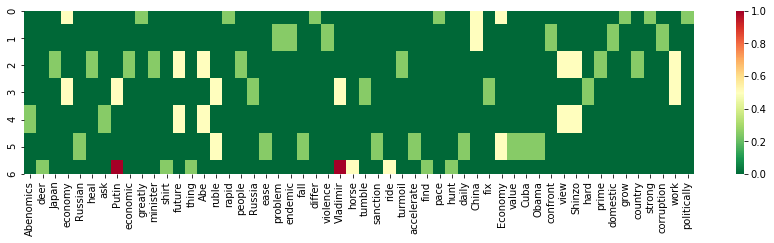

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 3))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);

## Exercise tf-idf

Collect at least 6 sentences from political parties in your country. Try to do tf-idf on them so that you can see what are the most common words used between the parties. You neeed to translate the sentences to english, so that I can evaluate :)